<a name='title'></a>
# **<font color="Navy"> Temas selectos para Ciencias de la Tierra </font>**
## **<font color="RoyalBlue"> Proyecto final </font>**
### **<font color="DodgerBlue"> Equipo: Ecohéroes </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

### **<font color="ForestGreen"> Precipitación de los ciclones tropicales en el Pacífico oriental </font>**

In [45]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [49]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [50]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

In [51]:
df=pd.read_csv('/home/jovyan/TS_Sofía_Castro/mstcp_main_dataset (1).csv')
df

,Unnamed: 0,row_id,SID,ISO_TIME,NAME,LAT,LON,variant,RA_over_threshold,area_avg_TCP,lat_max_precip,lon_max_precip,max_precip,RMR,RA,RMR2
0,0,500083,1991046S18150,1991-02-17 03:00:00,DAPHNE,-18.0350,145.707,Past,356582.996715,1.141446,-18.550000,145.550000,30.854166,59.615820,3.565830,50
1,1,560507,1998295N12284,1998-11-02 06:00:00,MITCH,17.1000,-93.100,Past,483827.963921,1.158202,15.450000,-96.149994,15.229167,373.678744,4.838280,40
2,2,587928,2003068S14172,2003-03-11 15:00:00,ESETA,-19.8451,173.524,Past,544015.559231,1.994440,-19.250004,173.850020,23.604166,74.469813,5.440156,70
3,3,424944,1980024S11076,1980-01-26,IVANNE,-14.0000,76.000,Past,276383.337244,0.588836,-11.649999,72.750000,5.062500,438.660908,2.763833,280
4,4,623191,2008283N12271,2008-10-13 03:00:00,ODILE,18.2301,-104.808,Past,22758.538250,0.069604,20.850002,-106.149994,3.833333,323.479329,0.227585,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294430,294430,564174,1999169N13264,1999-06-17 18:00:00,ADRIAN,13.5000,-96.500,Past,489099.384592,1.036113,15.850001,-97.149994,10.833333,270.499025,4.890994,0
294431,294431,569397,2000088N08090,2000-03-29,NOT_NAMED,12.5000,88.000,Past,448195.531474,0.974803,11.950000,88.450000,5.916666,78.304919,4.481955,70
294432,294432,470689,1986302N05178,1986-11-05 18:00:00,HERBERT,12.3692,130.065,Past,414104.357404,0.732350,14.149997,129.950000,9.354167,198.406334,4.141044,20
294433,294433,608727,2006180N06140,2006-07-01 18:00:00,EWINIAR,10.6250,136.050,Past,277174.290425,0.907336,10.149997,136.150010,19.437500,53.938674,2.771743,30


In [52]:
#Vamos a seleccionar los años, para eso quitamos los meses, día y tiempo
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce') #coerce ayuda a convertir a las fechas que no se pueden analizar
                                                                 #a nan
#Quitamos los decimales y agregamos la columna al df
df['año'] = df['ISO_TIME'].dt.year.astype('Int64')
df['año']

0         1991
1         1998
2         2003
3         <NA>
4         2008
          ... 
294430    1999
294431    <NA>
294432    1986
294433    2006
294434    1984
Name: año, Length: 294435, dtype: Int64

In [53]:
#Quitamos los nan
df_new = df.dropna()
#Ordenamos la columna de menor a mayor año
df2 = df_new.sort_values(by='año').reset_index(drop=True)
df2

,Unnamed: 0,row_id,SID,ISO_TIME,NAME,LAT,LON,variant,RA_over_threshold,area_avg_TCP,lat_max_precip,lon_max_precip,max_precip,RMR,RA,RMR2,año
0,147432,417857,1979035S19042,1979-02-05 21:00:00,DORA,-20.25690,43.3179,Past,114625.663226,0.226832,-20.050000,48.050000,3.270833,494.487234,1.146257,490,1979
1,255897,422436,1979258N20273,1979-09-21 18:00:00,HENRI,22.30000,-92.3000,Past,96179.935211,0.184365,23.050000,-93.350000,4.729166,136.236524,0.961799,120,1979
2,139628,422768,1979269N19133,1979-09-29 12:00:00,NOT_NAMED,23.10000,114.7000,Past,0.000000,0.001343,19.050000,116.650010,0.166667,493.676942,0.000000,490,1979
3,65119,421736,1979241N11335,1979-09-05 06:00:00,FREDERIC,17.50000,-68.7000,Past,346732.611032,1.526464,17.649998,-64.749990,48.270832,419.043432,3.467326,420,1979
4,255866,423880,1979333N07169,1979-12-06 15:00:00,ABBY,9.53119,148.8360,Past,306787.252245,1.226177,7.049998,147.650010,16.208334,305.197389,3.067873,280,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256759,280330,710840,2023018S14058,2023-01-27 21:00:00,CHENESO,-23.62750,41.6151,NRT,415708.527394,1.259283,-24.750004,41.050000,32.443347,137.348280,4.157085,110,2023
256760,44020,711034,2023039S15153,2023-02-10 09:00:00,GABRIELLE,-23.99940,160.9920,NRT,558961.896956,2.498799,-25.050000,163.450000,18.905507,274.725267,5.589619,190,2023
256761,90949,711035,2023039S15153,2023-02-10 12:00:00,GABRIELLE,-24.80000,162.4000,NRT,497201.333556,2.335745,-26.550000,163.250020,31.264222,212.417584,4.972013,210,2023
256762,129555,710798,2023018S14058,2023-01-22 15:00:00,CHENESO,-19.52770,44.3999,NRT,520620.408799,1.713436,-17.950000,45.850002,10.943949,232.574016,5.206204,70,2023


In [54]:
ciclones = df2[['LAT','LON', 'max_precip', 'año']]
ciclones['max_precip'].max()

199.6875

In [55]:
# Agrupamos por año y sumamos la precipitación anual
precip_anual = ciclones.groupby('año')['max_precip'].sum().reset_index()
precip_anual

,año,max_precip
0,1979,57737.729206
1,1980,54776.666636
2,1981,64391.000002
3,1982,61012.812454
4,1983,55742.895834
5,1984,70884.979147
6,1985,74549.895838
7,1986,75932.937487
8,1987,61444.770857
9,1988,64467.020799


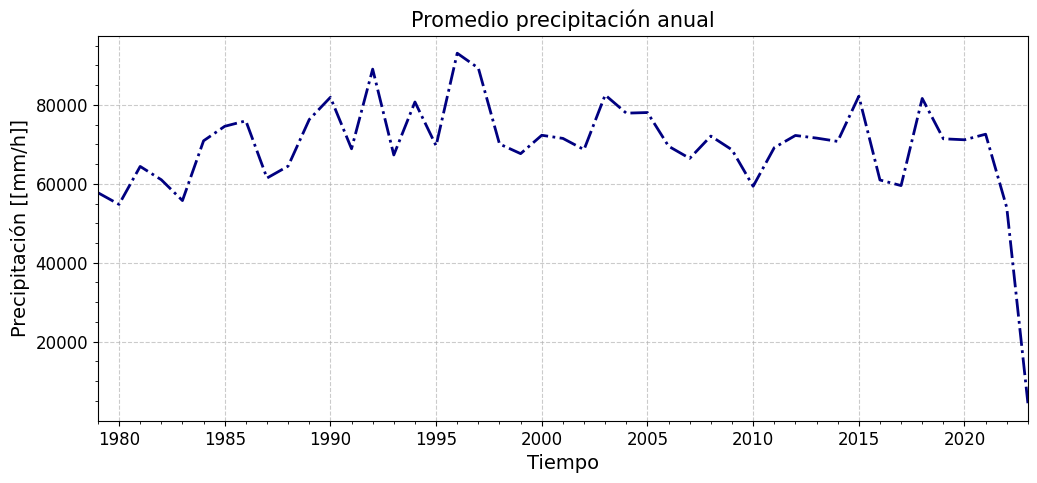

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(precip_anual['año'], precip_anual['max_precip'], c='navy', linewidth=2,linestyle='-.')
grafico_linea_ts(1979, 2023,'Tiempo','Precipitación [[mm/h]]',title='Promedio precipitación anual',ymin=None,ymax=None,legend=False)
plt.savefig('Pr_anual.png')

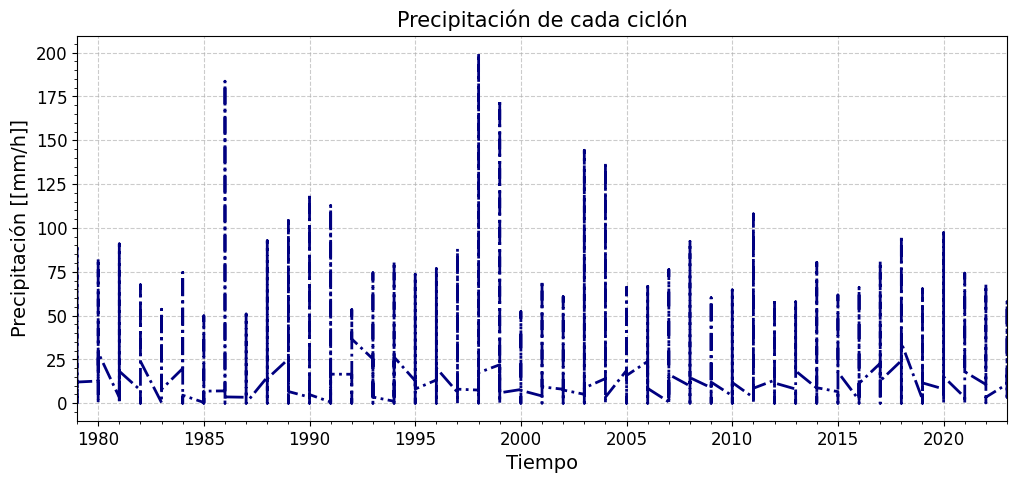

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(ciclones['año'], ciclones['max_precip'], c='navy', linewidth=2,linestyle='-.')
grafico_linea_ts(1979, 2023,'Tiempo','Precipitación [[mm/h]]',title='Precipitación de cada ciclón',ymin=None,ymax=None,legend=False)
plt.savefig('Pr_ciclon.png')